In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load the dataset and print the first 5 rows
data = pd.read_csv('US-pumpkins.csv')
data.head()

,City Name,Type,Package,Variety,Sub Variety,Grade,Date,Low Price,High Price,Mostly Low,...,Unit of Sale,Quality,Condition,Appearance,Storage,Crop,Repack,Trans Mode,Unnamed: 24,Unnamed: 25
0,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,4/29/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
1,BALTIMORE,NaN,24 inch bins,NaN,NaN,NaN,5/6/17,270.0,280.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,E,NaN,NaN,NaN
2,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
3,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,9/24/16,160.0,160.0,160.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN
4,BALTIMORE,NaN,24 inch bins,HOWDEN TYPE,NaN,NaN,11/5/16,90.0,100.0,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN


In [3]:
data = data[data['Package'].str.contains('bushel', case=True, regex=True)]

In [4]:
# check the shape of the dataset
data.shape

(415, 26)

In [5]:
#  check for null values in the dataset
data.isnull().sum()

City Name            0
Type               406
Package              0
Variety              0
Sub Variety        167
Grade              415
Date                 0
Low Price            0
High Price           0
Mostly Low          24
Mostly High         24
Origin               0
Origin District    396
Item Size          114
Color              145
Environment        415
Unit of Sale       404
Quality            415
Condition          415
Appearance         415
Storage            415
Crop               415
Repack               0
Trans Mode         415
Unnamed: 24        415
Unnamed: 25        391
dtype: int64

In [6]:
# drop the columns that are not necessary
new_columns = ['Package', 'Variety', 'City Name', 'Month', 'Low Price', 'High Price', 'Date']
new_data = data.drop([i for i in data.columns if i not in new_columns], axis=1)

In [7]:
# determine the average price of pumpkin
avg_price = (new_data['Low Price'] + new_data['High Price']) / 2
# print(avg_price)

month = pd.DatetimeIndex(new_data['Date']). month
print(month)

Int64Index([ 9,  9, 10, 10, 10, 10, 10, 10, 10, 10,
            ...
             9,  9,  9,  9,  9,  9,  9,  9,  9,  9],
           dtype='int64', name='Date', length=415)


In [8]:
# create a new dataset with desired columns
final_data = pd.DataFrame({'Month': month,
                           'Variety': new_data['Variety'],
                           'City': new_data['City Name'],
                            'Package': new_data['Package'],
                            'Low Price': new_data['Low Price'],
                            'High Price': new_data['High Price'],
                            'Price': avg_price})

In [9]:
final_data['Package'].nunique()
final_data.tail()

,Month,Variety,City,Package,Low Price,High Price,Price
1738,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,15.00,15.0,15.000
1739,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,13.75,15.0,14.375
1740,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,10.75,15.0,12.875
1741,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,12.000
1742,9,MINIATURE,ST. LOUIS,1/2 bushel cartons,12.00,12.0,12.000


In [10]:
final_data.loc[final_data['Package'].str.contains('1 1/9'), 'Price'] = avg_price/(1 + 1/9)
final_data.loc[final_data['Package'].str.contains('1/2'), 'Price'] = avg_price/(1/2)

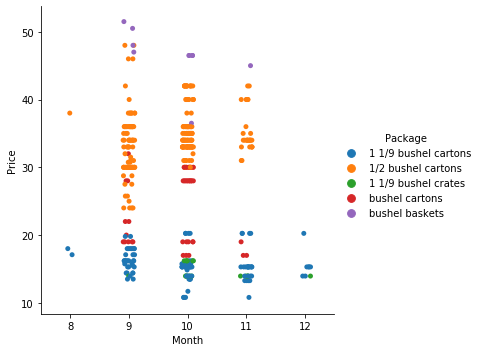

In [11]:
sns.catplot(x='Month', y='Price', data=final_data, hue='Package')

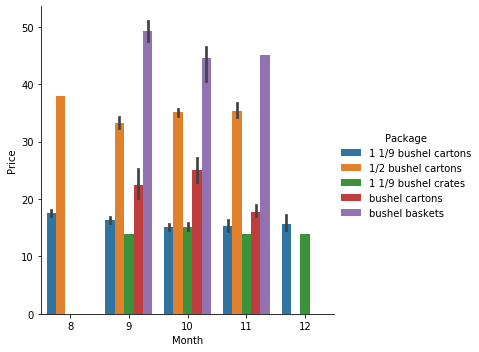

In [12]:
sns.catplot(x='Month', y='Price', data=final_data, hue='Package', kind='bar')

Text(0, 0.5, 'Pumpkin Price')

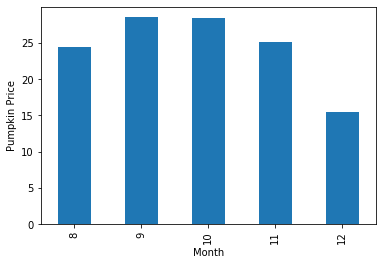

In [13]:
final_data.groupby(['Month'])['Price'].mean().plot(kind='bar')
plt.ylabel("Pumpkin Price")

# Linear Regression

In [14]:
# import label encoder to turn text values to numerical
from sklearn.preprocessing import LabelEncoder

final_data.iloc[:, 0:-1] = final_data.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)
# final_data.iloc[:, 0:-1] = final_data.iloc[:, 0:-1].apply(LabelEncoder().fit_transform)

final_data.head()

,Month,Variety,City,Package,Low Price,High Price,Price
70,1,3,1,0,5,3,13.5
71,1,3,1,0,10,7,16.2
72,2,3,1,0,10,7,16.2
73,2,3,1,0,9,6,15.3
74,2,3,1,0,5,3,13.5


In [15]:
# check the correlation between the values
for i in final_data.columns:
    print(f"{i} : {final_data[i].corr(final_data['Price'])}")

Month : -0.14912913634278588
Variety : -0.8644282756946227
City : 0.3238250993608744
Package : 0.6088482822590116
Low Price : 0.320745999844101
High Price : 0.36973193448232944
Price : 0.9999999999999998


In [16]:
final_data.dropna(inplace=True)
final_data.isnull().sum()

Month         0
Variety       0
City          0
Package       0
Low Price     0
High Price    0
Price         0
dtype: int64

In [17]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 415 entries, 70 to 1742
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       415 non-null    int64  
 1   Variety     415 non-null    int32  
 2   City        415 non-null    int32  
 3   Package     415 non-null    int32  
 4   Low Price   415 non-null    int64  
 5   High Price  415 non-null    int64  
 6   Price       415 non-null    float64
dtypes: float64(1), int32(3), int64(3)
memory usage: 21.1 KB


In [18]:
#  select the columns that will bw used to feed the model
new_col = ['Package', 'Price']
lin_reg = final_data.drop([i for i in final_data.columns if i not in new_col], axis='columns')

lin_reg

,Package,Price
70,0,13.50
71,0,16.20
72,0,16.20
73,0,15.30
74,0,13.50
...,...,...
1738,2,30.00
1739,2,28.75
1740,2,25.75
1741,2,24.00


In [19]:
X = lin_reg.values[:, :1]
y = lin_reg.values[:, 1:2]

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train, y_train)

pred = lin_reg_model.predict(X_test)

accuracy_score = lin_reg_model.score(X_train, y_train)
print(f"Model Accuracy:  {accuracy_score}")

Model Accuracy:  0.3348784132038001


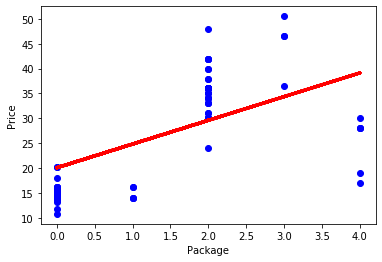

In [21]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, pred, color='red', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()

# Polynomial Regression

In [22]:
new_columns = ['Package', 'Variety', 'City', 'Month', 'Price']
poly_cols = final_data.drop([i for i in final_data.columns if i not in new_columns], axis='columns')

poly_cols.head()

,Month,Variety,City,Package,Price
70,1,3,1,0,13.5
71,1,3,1,0,16.2
72,2,3,1,0,16.2
73,2,3,1,0,15.3
74,2,3,1,0,13.5


In [23]:
corr = poly_cols.corr()
corr.style.background_gradient(cmap='coolwarm')

,Month,Variety,City,Package,Price
Month,1.000000,0.171330,-0.188728,-0.144847,-0.149129
Variety,0.171330,1.000000,-0.248441,-0.614855,-0.864428
City,-0.188728,-0.248441,1.000000,0.301604,0.323825
Package,-0.144847,-0.614855,0.301604,1.000000,0.608848
Price,-0.149129,-0.864428,0.323825,0.608848,1.000000


In [24]:
# we choose the package column because of the high corellation
X = poly_cols.iloc[:, 3:4].values
y = poly_cols.iloc[:, 4:5].values

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(PolynomialFeatures(4), LinearRegression())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

pipeline.fit(np.array(X_train), y_train)

y_pred = pipeline.predict(X_test)

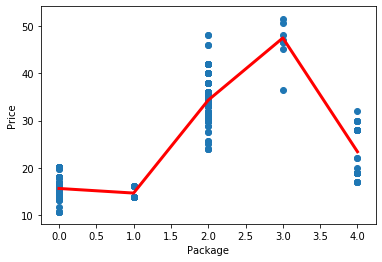

In [26]:
df = pd.DataFrame({'x': X_test[:, 0], 'y': y_pred[:, 0]})
df.sort_values(by='x', inplace=True)
points = pd.DataFrame(df).to_numpy()

plt.plot(points[:, 0], points[:, 1], color='red', linewidth=3)
plt.xlabel('Package')
plt.ylabel('Price')
plt.scatter(X, y)
plt.show()

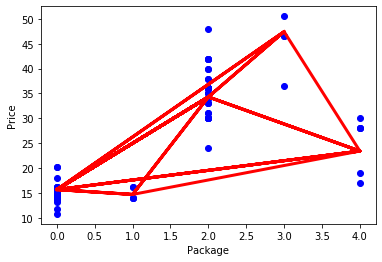

In [27]:
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)

plt.xlabel('Package')
plt.ylabel('Price')

plt.show()

In [28]:
accuracy_score = pipeline.score(X_train, y_train)
print(f"Model Accuracy:  {accuracy_score}")

Model Accuracy:  0.8558738910762582
